## Successfully Funded Projects
This project aims to understand and predict successfully funded kickstarter projects using ML algorithms. The dataset that will be used can be found [here](https://www.kaggle.com/codename007/funding-successful-projects). The project will contain several research jupyter notebooks to confirm viability of this dataset in making predictions and potentially followed by a end-to-end web app. This notebook of the research series will be concerned with exploratory data analysis to understand the data better

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

C:\Users\ali95\Anaconda3\envs\python3.7\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ali95\Anaconda3\envs\python3.7\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ali95\Anaconda3\envs\python3.7\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
df = pd.read_csv('train.csv')
df.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


The target variable is 'final_status' which is binary with 1 indicating successfully funded and 0 for not funded

In [4]:
df.shape

(108129, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 14 columns):
project_id               108129 non-null object
name                     108126 non-null object
desc                     108120 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null int64
state_changed_at         108129 non-null int64
created_at               108129 non-null int64
launched_at              108129 non-null int64
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 10.8+ MB


In [6]:
df.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


#### Missing Values

In [7]:
df.isnull().sum() # number of missing values in each column

project_id               0
name                     3
desc                     9
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
dtype: int64

In [8]:
df.isnull().mean() # percentage missing of total points

project_id               0.000000
name                     0.000028
desc                     0.000083
goal                     0.000000
keywords                 0.000000
disable_communication    0.000000
country                  0.000000
currency                 0.000000
deadline                 0.000000
state_changed_at         0.000000
created_at               0.000000
launched_at              0.000000
backers_count            0.000000
final_status             0.000000
dtype: float64

Exploring how those missing values may impact the target variable, 'final_status'

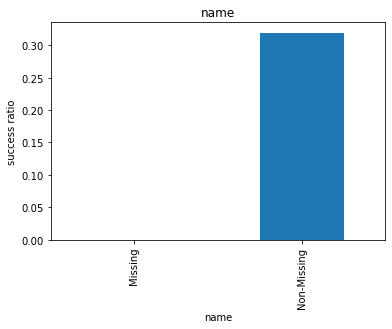

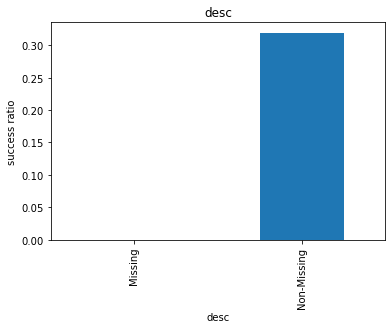

In [66]:
VARS_WITH_NA = [var for var in df.columns if df[var].isnull().sum()>0]

def plot_bin_vars(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(), "Missing", "Non-Missing")
    df.groupby(var)['final_status'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('success ratio')
    plt.show()
    
for var in VARS_WITH_NA:
    plot_bin_vars(df, var)

As can be noticed, projects with no name or description information are likely to be rejected

#### Data Balance

In [14]:
df['final_status'].value_counts()

0    73568
1    34561
Name: final_status, dtype: int64

In [31]:
print(df['final_status'].value_counts()/len(df)*100) # percent of the total

0    68.037252
1    31.962748
Name: final_status, dtype: float64


We can notice that the dataset is clearly imbalanced. More projects were rejected than approved for funding. Although this is natural as financiers usually look for very specific things in a project to fund it, we may have to handle this imbalance later in feature engineering notebook

#### Numerical Vars

In [32]:
NUM_VARS = [var for var in df.columns if df[var].dtype!='O']

NUM_VARS

['goal',
 'disable_communication',
 'deadline',
 'state_changed_at',
 'created_at',
 'launched_at',
 'backers_count',
 'final_status']

Many of our numerical variables are either binary or date (in unix time format, as deadline, state_changes_at, created_at, and launched_at variables). Let's find which ones are continuous and non-date

In [34]:
df[NUM_VARS].nunique() # number of unique vars in each numerical

goal                       3567
disable_communication         2
deadline                 100933
state_changed_at         102417
created_at               108062
launched_at              108039
backers_count              2426
final_status                  2
dtype: int64

Other than date and binary variables, variables 'goal' and 'backers_count' can be considered numerical continuous. None of the numerical variables can be dismissed for analysis

Next, we will check the significance of temporal numeric variables to the target

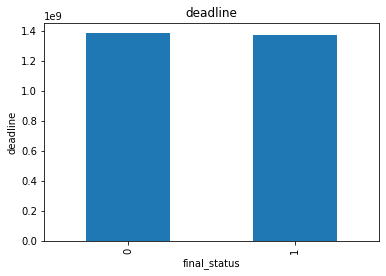

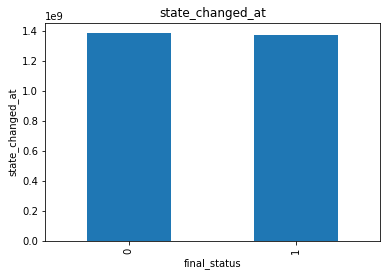

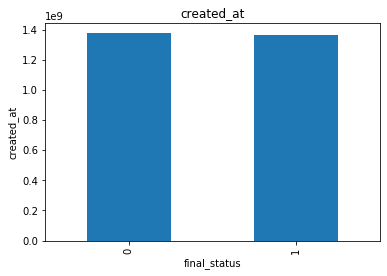

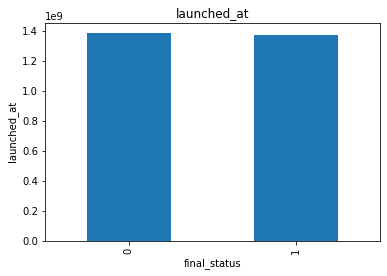

In [44]:
TEMP_VARS = ['deadline', 'state_changed_at', 'created_at', 'launched_at']

def plot_vars_significance(df, var):
    df = df.copy()
    df.groupby('final_status')[var].mean().plot.bar()
    plt.title(var)
    plt.ylabel(var)
    plt.show()

for var in TEMP_VARS:
    plot_vars_significance(df, var)

Most projects were created, launched, changed status and deadlined around similar time respective periods (within same months/years), with equivalent approval and denial ratios. Next we will try to find more insights from these date variables. 

One clearly important feature is the time from creation till deadline, indicating the amount of time given for each project. Another is the time from launching the project live till status change, indicating how quickly (or slowly) the project is funded. In a real scenario, however, we don't know when will status of a project change so this feature is only used for exploration and will therefore not be used further later

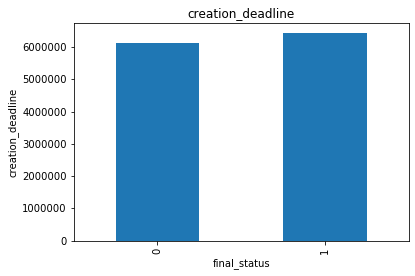

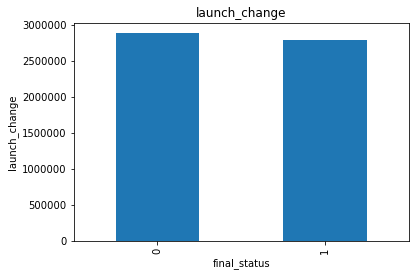

In [45]:
def plot_temp_periods(df):
    df = df.copy()
    df['creation_deadline'] = df['deadline'] - df['created_at']
    df['launch_change'] = df['state_changed_at'] - df['launched_at']
    
    for var in ['creation_deadline', 'launch_change']:
        df.groupby('final_status')[var].mean().plot.bar()
        plt.title(var)
        plt.ylabel(var)
        plt.show()

plot_temp_periods(df)

Although some variations do seem to appear, e.g. projects which were funded successfully had longer time till deadline on average, those are not significant enough to make solid conclusions

Next we will check the significance of binary variables on the target

In [46]:
BIN_VARS = [var for var in df.columns if df[var].nunique()==2]

BIN_VARS

['disable_communication', 'final_status']

We have already checked the balance of the dataset using the target, so the only binary variable to explore is 'disable_communication' which inidcates whether the project authors have disabled communication option with people donating to the project. We will check whether this variable had some impact on the approved projects

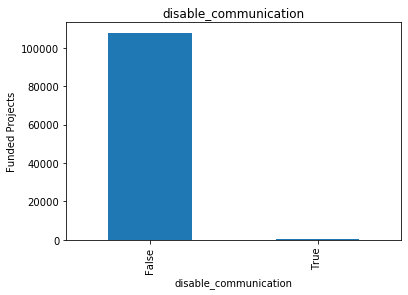

In [65]:
df.groupby('disable_communication')['final_status'].count().plot.bar()
plt.ylabel('Funded Projects')
plt.title('disable_communication')
plt.show()

Almost all projects with disabled communications with donnors were not approved for funding. 

Next, we will inspect continuous non-date variables; 'goal' and 'backers_count' as seen above

In [61]:
CONT_VARS = [var for var in NUM_VARS if var not in BIN_VARS+TEMP_VARS]

CONT_VARS

['goal', 'backers_count']

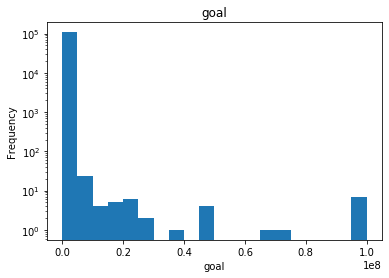

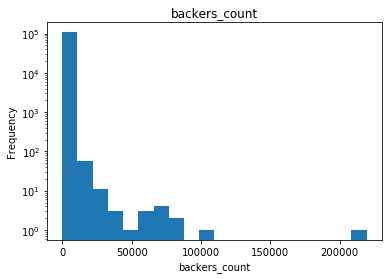

In [73]:
for var in CONT_VARS:
    df[var].plot.hist(bins=20, log=True)
    plt.title(var)
    plt.xlabel(var)
    plt.show()

From the figures above, most of the projects had financial goals under $30M USD and backer count under 50,000. The log figures do not show a significant trend or follow a specific distribution, therefore no special transformation will be applied to them. To explore the variance within these variables, we will use boxplots 

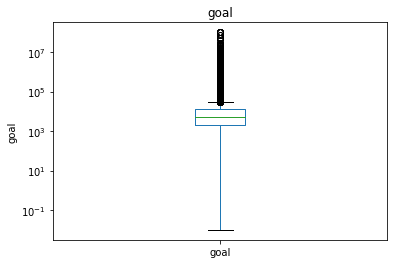

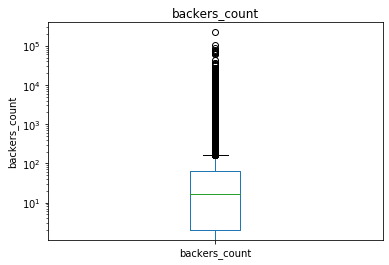

In [81]:
def plot_box_cont_vars(df, var):
    df = df.copy()
    df[var].plot.box(logy=True)
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in CONT_VARS:
    plot_box_cont_vars(df, var)

Most of projects' financial goal lie between 1,000 USD and $100,000 with other projects having much higher goals. As for the backers count, most projects have under 100 backers. Projects with significantly high financial goals and number of backers will be considered outliers as only few data points exist in these ranges and ML models will be prone to overfitting if those outliers are not eliminated before building the models.

We will get rid of these outliers in the feature engineering notebook

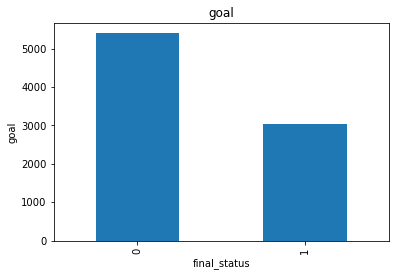

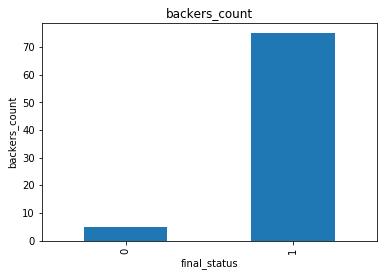

In [64]:
def plot_cont_vars(df, var):
    df = df.copy()
    df.groupby('final_status')[var].median().plot.bar()
    plt.title(var)
    plt.ylabel(var)
    plt.show()
    
for var in CONT_VARS:
    plot_cont_vars(df, var)

This first figure shows that successfully funded projects had, on median, lower financial goals than those not funded successfully. The contrast is more striking in the second figure where number of backers had huge influence on the success of funding. Since their influence on the final status, these variables are very important in the decision on whether a new project will be approved or not. 

#### String Vars
Here, we will inspect string variables in the dataset

In [86]:
STR_VARS = [var for var in df.columns if df[var].dtype=='O']

STR_VARS

['project_id', 'name', 'desc', 'keywords', 'country', 'currency']

Here, 'project_id' is not relevant so it could be dropped from string features list later. Let's inspect how many levels in each of those string variables

In [84]:
df[STR_VARS].nunique()

project_id    108129
name          107838
desc          107377
keywords      108129
country           11
currency           9
dtype: int64

Features 'name' and 'desc' have all unique values and therefore have string properties, 'country' and 'currency' have much fewer levels and can be considered as categories in the dataset. We will split these into string and categorical features

In [87]:
CATEGORICALS = [var for var in STR_VARS if df[var].nunique()<20]
STR_VARS = [var for var in STR_VARS if df[var].nunique()>20 and var != 'project_id']

STR_VARS

['name', 'desc', 'keywords']

In [88]:
df[STR_VARS].head()

,name,desc,keywords
0,drawing for dollars,I like drawing pictures. and then i color them...,drawing-for-dollars
1,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",sponsor-dereck-blackburn-lostwars-artist-in-re...
2,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,mr-squiggles
3,Help me write my second novel.,Do your part to help out starving artists and ...,help-me-write-my-second-novel
4,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",support-casting-my-sculpture-in-bronze


In [89]:
df[CATEGORICALS].head()

,country,currency
0,US,USD
1,US,USD
2,US,USD
3,US,USD
4,US,USD


We will now inspect categorical features first. Then we'll engineer string variables properly


In [91]:
df['country'].unique()

array(['US', 'GB', 'CA', 'AU', 'NZ', 'NL', 'SE', 'IE', 'NO', 'DK', 'DE'],
      dtype=object)

In [135]:
df['currency'].unique()

array(['USD', 'GBP', 'CAD', 'AUD', 'NZD', 'EUR', 'SEK', 'NOK', 'DKK'],
      dtype=object)

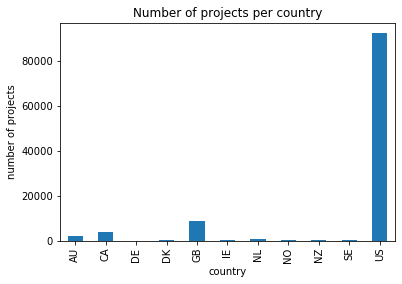

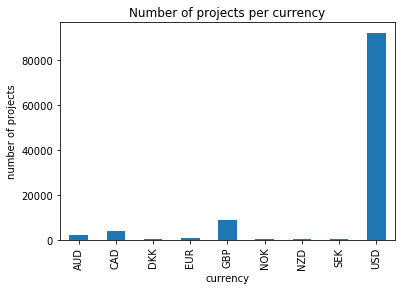

In [136]:
def plot_count_bars(df, var):
    df.groupby(var)['final_status'].count().plot.bar()
    plt.ylabel('number of projects')
    plt.title(f'Number of projects per {var}')
    plt.show()
    
for var in CATEGORICALS:
    plot_count_bars(df, var)

Most of the dataset projects were created in the US and in USD currency. Let's inspect how many countries and currencies are rarely submitting projects (<1% total submittals)

In [133]:
def rare_labels(df, var, rare_perc):
    df = df.copy()
    return list(df[var].value_counts()[df[var].value_counts()/len(df) < rare_perc].index)

In [134]:
rare_countries = rare_labels(df, 'country', 0.01)
rare_countries

['NL', 'NZ', 'SE', 'DK', 'NO', 'IE', 'DE']

In [137]:
rare_currencies = rare_labels(df, 'currency', 0.01)
rare_currencies

['EUR', 'NZD', 'SEK', 'DKK', 'NOK']

Those rare countries and currencies will be dealt with in feature engineering notebook

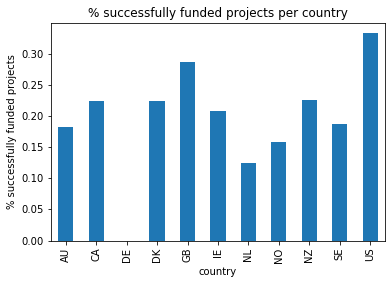

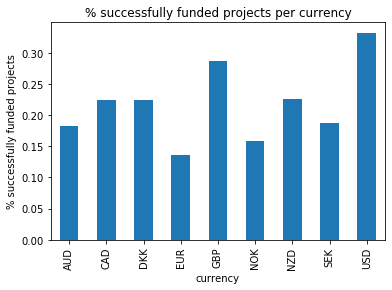

In [141]:
def plot_cat_target(df, var):
    df = df.copy()
    df.groupby(var)['final_status'].mean().plot.bar()
    plt.ylabel('% successfully funded projects')
    plt.title(f'% successfully funded projects per {var}')
    plt.show()

for var in CATEGORICALS:
    plot_cat_target(df, var)

This shows varying degrees of fund successes across countries and currencies, still dominated by the US with more than 30% fund successes.

Next, we will inspect and engineer string features to extract insight from them

In [142]:
STR_VARS

['name', 'desc', 'keywords']

In [146]:
df[STR_VARS].head(15)

,name,desc,keywords
0,drawing for dollars,I like drawing pictures. and then i color them...,drawing-for-dollars
1,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",sponsor-dereck-blackburn-lostwars-artist-in-re...
2,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,mr-squiggles
3,Help me write my second novel.,Do your part to help out starving artists and ...,help-me-write-my-second-novel
4,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",support-casting-my-sculpture-in-bronze
5,daily digest,I'm a fledgling videoblogger living in Brookly...,daily-digest
6,iGoozex - Free iPhone app,I am an independent iPhone developer that beli...,igoozex-free-iphone-app
7,Drive A Faster Car 2.0,Drive A Faster Car (http://www.driveafastercar...,drive-a-faster-car-20
8,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...","Opening Friday, June 5 2009, on view through S...",lostles-at-tinys-giant
9,Choose Your Own Adventure - A Robot Painting S...,This project is for a Choose Your Own Adventur...,choose-your-own-adventure-a-robot-painting-series


We notice that keywords column is mostly just the name column with words in lowercase and separated by dashes. to avoid overfitting, we will only consider one of them. In this case, we will consider the keywords column as some names have been missing as seen before. We will separate the words and pass them to a vectorizer that identifies their significance

Here, we will use Tfidf-Vectorizer (Term Frequency-Inverse Term Frequency) 

In [147]:
STR_VARS = ['desc', 'keywords']

df.keywords = df.keywords.str.replace('-', ' ') # replace dashes with spaces

df[STR_VARS].head()

,desc,keywords
0,I like drawing pictures. and then i color them...,drawing for dollars
1,"I, Dereck Blackburn will be taking upon an inc...",sponsor dereck blackburn lostwars artist in re...
2,So I saw darkpony's successfully funded drawin...,mr squiggles
3,Do your part to help out starving artists and ...,help me write my second novel
4,"I'm nearing completion on a sculpture, current...",support casting my sculpture in bronze


Before vectorizing the string columns, we can simplify things a bit by merging the 'keywords' and 'desc' into one string column and creating a single vectorizer for the resultant column only

In [154]:
df.dropna(inplace=True)
df.reset_index()
df[STR_VARS].head()

,desc,keywords
0,I like drawing pictures. and then i color them...,drawing for dollars
1,"I, Dereck Blackburn will be taking upon an inc...",sponsor dereck blackburn lostwars artist in re...
2,So I saw darkpony's successfully funded drawin...,mr squiggles
3,Do your part to help out starving artists and ...,help me write my second novel
4,"I'm nearing completion on a sculpture, current...",support casting my sculpture in bronze


In [155]:
df['name-desc'] = df['keywords'] + ' ' + df['desc'] 

df['name-desc'].head()

0    drawing for dollars I like drawing pictures. a...
1    sponsor dereck blackburn lostwars artist in re...
2    mr squiggles So I saw darkpony's successfully ...
3    help me write my second novel Do your part to ...
4    support casting my sculpture in bronze I'm nea...
Name: name-desc, dtype: object

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

tfidf = TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2), max_df=0.7, max_features=1000)

X = tfidf.fit_transform(df['name-desc']).todense().tolist()
feat_names = tfidf.get_feature_names()

X = pd.DataFrame(X, columns=feat_names)
X.head()

,000,10,100,11,12,13,15,1st,20,2011,...,year,year old,years,yet,york,young,youth,youtube,zombie,zombies
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.396761,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
X.shape

(108119, 1000)

In [174]:
tfidf.vocabulary_

{'like': 498,
 'pictures': 635,
 'color': 165,
 'would': 982,
 'something': 809,
 'wants': 950,
 'artist': 61,
 'taking': 868,
 'journey': 464,
 'month': 550,
 'may': 531,
 'traveling': 905,
 'project': 690,
 'fun': 354,
 'help': 406,
 'write': 984,
 'second': 767,
 'novel': 593,
 'part': 615,
 'artists': 62,
 'finished': 328,
 'writing': 987,
 'first': 330,
 'support': 858,
 'sculpture': 763,
 'currently': 203,
 'man': 527,
 '13': 5,
 'daily': 205,
 'living': 505,
 'brooklyn': 110,
 'making': 526,
 'check': 145,
 'www': 989,
 'com': 166,
 'free': 345,
 'iphone': 453,
 'app': 53,
 'independent': 439,
 'software': 806,
 'released': 728,
 'drive': 244,
 'car': 128,
 '20': 8,
 'personal': 627,
 'love': 513,
 'past': 618,
 'years': 992,
 'view': 937,
 'shop': 784,
 'st': 827,
 'nyc': 594,
 'michael': 538,
 'choose': 150,
 'adventure': 24,
 'robot': 741,
 'painting': 610,
 'series': 775,
 'works': 979,
 'put': 700,
 'line': 501,
 'book': 100,
 'bit': 93,
 'inspired': 445,
 'digital': 231,
 

We have chosen 1,000 best features (1 or 2 words) to represent the training corpus. Those words are shown in the output of the above cell with their respective frequencies 

#### Conclusion
In this notebook, we have explored the dataset and transformed some string features to numeric representations. In the next notebook we will consider feature engineering the columns and make them ML-ready